In [9]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 데이터 파싱
data = pd.read_csv('./Data/EmbeddingTrainData4.csv')
data = data.to_numpy()
data = np.delete(data, 0, axis=0)
data = np.delete(data, 0, axis=1)

np.random.shuffle(data)

train_data = data[:18071]
test_data = data[18072:]

train_x = []
train_y = []
test_x = []
test_y = []

for line in train_data:
  train_x.append(line[:27])
  train_y.append(line[28])

for line in test_data:
  test_x.append(line[:27])
  test_y.append(line[28])



outer_temp_train = []
for line in train_x:
  temp = []
  for word in line:
    word = word.replace('[', '')
    word = word.replace(']', '')
    temp.append(list(map(float, word.split(','))))

  outer_temp_train.append(temp)

train_x = outer_temp_train

outer_temp_test = []
for line in test_x:
  temp = []
  for word in line:
    word = word.replace('[', '')
    word = word.replace(']', '')
    temp.append(list(map(float, word.split(','))))

  outer_temp_test.append(temp)

test_x = outer_temp_test

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [11]:
#모델
# Dropout -> 과적합 방지를 위한 버리기
model = Sequential()
model.add(LSTM(512, activation='relu', input_shape=(27, 100), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(256, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Dropout(0.3))
model.add(Dense(11, activation='softmax'))
model.add(Dense(11, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('./best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

sgd = optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
history = model.fit(train_x, train_y.tolist(), epochs=20, batch_size=1, callbacks=[es, mc], validation_data=(test_x, test_y.tolist()))

Epoch 1/20
18070/18071 [============================>.] - ETA: 0s - loss: 2.2628 - acc: 0.2835
Epoch 1: val_acc improved from -inf to 0.28676, saving model to ./best_model.h5
18071/18071 [==============================] - 728s 40ms/step - loss: 2.2627 - acc: 0.2835 - val_loss: 2.1373 - val_acc: 0.2868
Epoch 2/20
18070/18071 [============================>.] - ETA: 0s - loss: 2.0434 - acc: 0.2836
Epoch 2: val_acc did not improve from 0.28676
18071/18071 [==============================] - 722s 40ms/step - loss: 2.0434 - acc: 0.2835 - val_loss: 1.9594 - val_acc: 0.2868
Epoch 3/20
18071/18071 [==============================] - ETA: 0s - loss: 1.8976 - acc: 0.2835
Epoch 3: val_acc did not improve from 0.28676
18071/18071 [==============================] - 717s 40ms/step - loss: 1.8976 - acc: 0.2835 - val_loss: 1.8403 - val_acc: 0.2868
Epoch 4/20
18070/18071 [============================>.] - ETA: 0s - loss: 1.7989 - acc: 0.2836
Epoch 4: val_acc did not improve from 0.28676
18071/18071 [=====

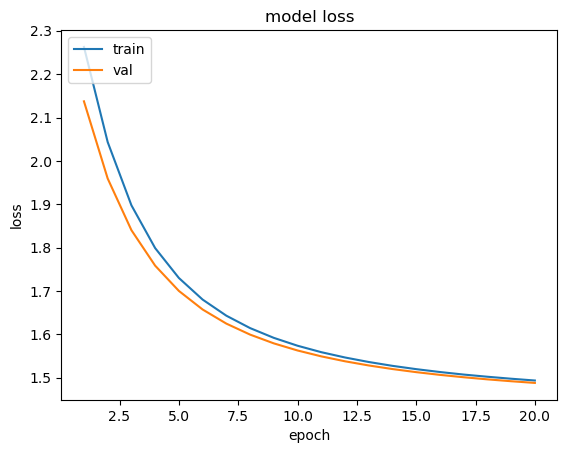

In [12]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
loaded_model = load_model('best_model.h5')
loaded_model.summary()
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(test_x, test_y.tolist())[1]))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 27, 512)           1255424   
                                                                 
 dropout_4 (Dropout)         (None, 27, 512)           0         
                                                                 
 lstm_23 (LSTM)              (None, 27, 256)           787456    
                                                                 
 dropout_5 (Dropout)         (None, 27, 256)           0         
                                                                 
 lstm_24 (LSTM)              (None, 128)               197120    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 128)              

In [14]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(test_x, test_y.tolist())[1]))
#model.save('./softmax.h5')

142/142 [==============================] - 6s 41ms/step - loss: 1.4881 - acc: 0.2870

 테스트 정확도: 0.2870


In [22]:
from keras import backend as K

K.tensorflow_backend._get_available_gpus()

AttributeError: module 'keras.backend' has no attribute 'tensorflow_backend'